In [38]:
base_path="../eit_dual_experiments/exp_0.1a" #Don't add '/' at start and end
T=200 #Training time period
C=10000 #Capital available
file=1 #Index_file
m=8 #Inital Size of Kernel
lbuck=2 #Size Of Buckets
pho=0.1 #Transaction Cost Proportion
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.25  # upper_bound
xii=1.2 # Limit for Tracking Error
k=20 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=100
w_risk=110
w_risk_down=1
#cj,cb are declared in script

In [2]:
import sys
from IPython.display import Image, display
sys.path.insert(0,"..")

In [3]:
from eit_dual_exp import TestEitDual

### Test Linear Relaxation script

In [12]:
!rm -r $base_path

rm: ../eit_dual_experiments/exp_0.1a: No such file or directory


In [20]:
base_path

'../eit_dual_experiments/exp_0.1a'

In [29]:
base_path

'../eit_dual_experiments/exp_0.2a'

In [47]:
%%time
!python ../src_dual/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f\
$w_return $w_risk $w_risk_down $base_path

Running Linear Relaxation of EIT ...with input args=14
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 305 (-33) rows, 522 (-33) columns and 6988 (-99) elements
Clp0014I Perturbing problem by 0.001% of 0.063192097 - largest nonzero change 9.4488343e-05 ( 3275.502%) - largest zero change 9.4142797e-05
Clp0000I Optimal - objective value 0.054504718
Coin0511I After Postsolve, objective 0.054504718, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.05450471813 - 362 iterations time 0.012, Presolve 0.00
***************************************************

Optimisation Status=0
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
CPU times: user 29.8 ms, sys: 16 ms, total: 45.8 ms
Wall time: 2.16 s


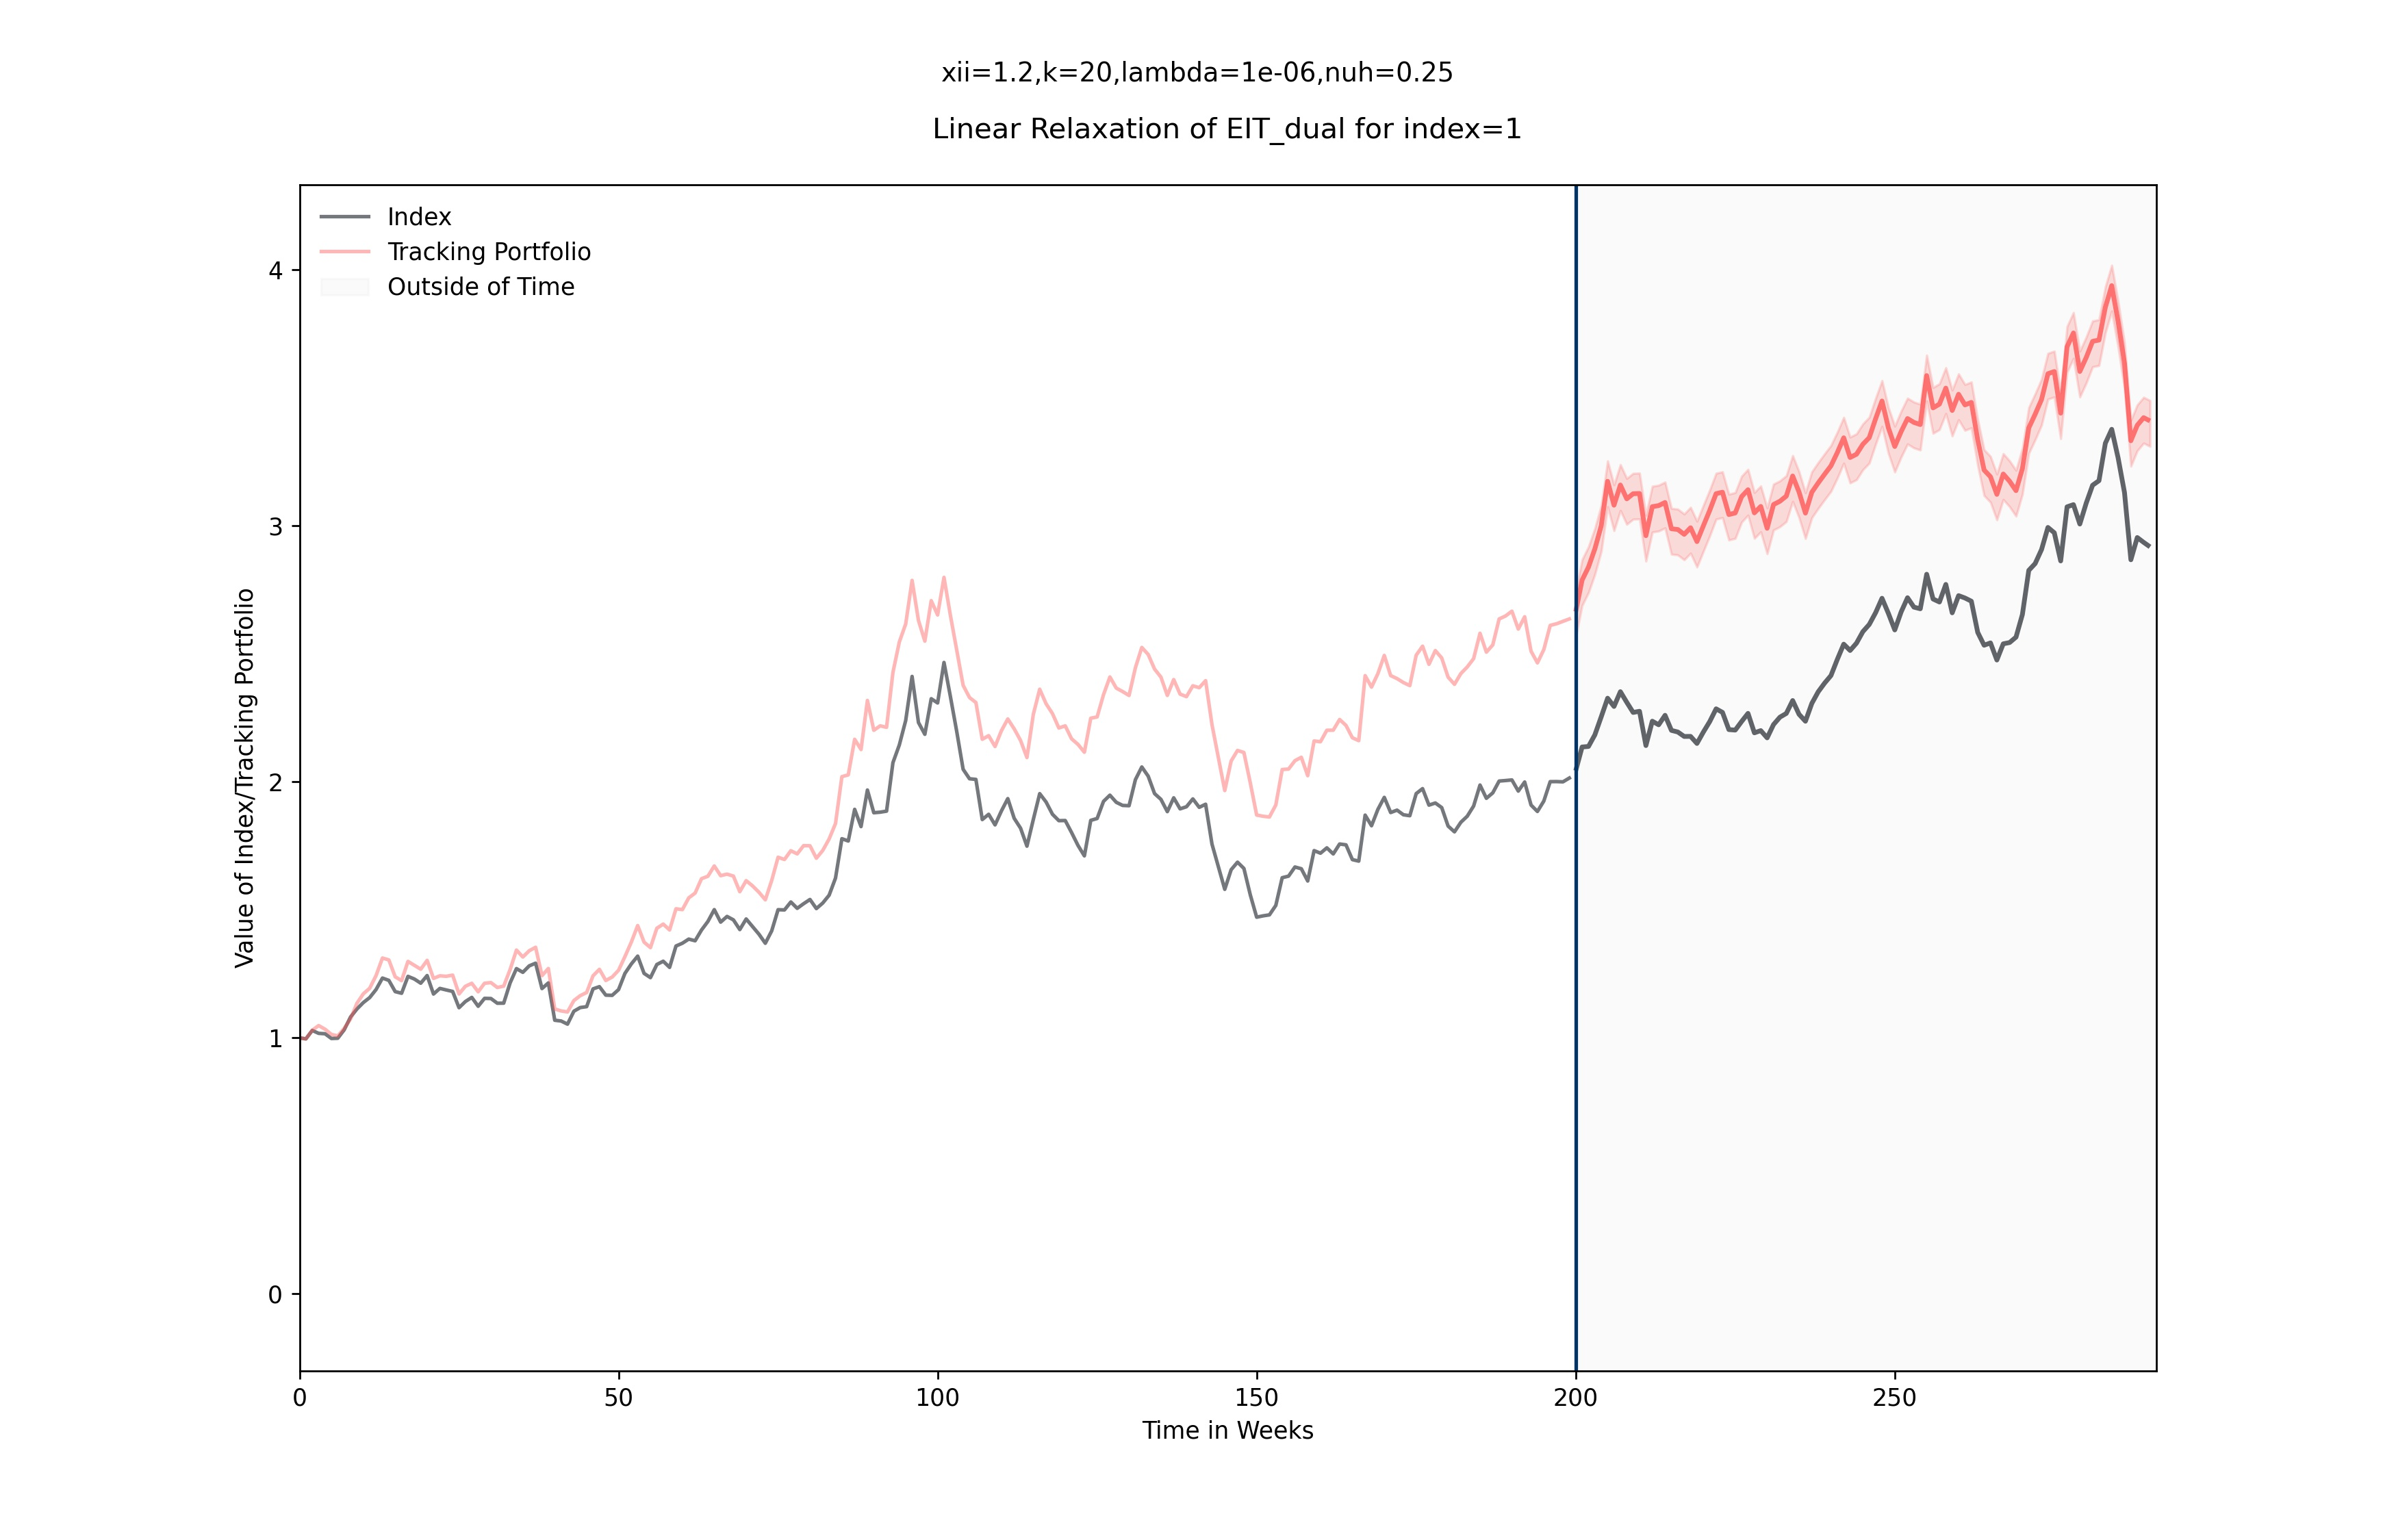

In [48]:
Image(filename=base_path+'/LP_EIT_Dual for index_{}.jpg'.format(file))

### Test step_1 of eit_dual_experiment

In [32]:
base_path="../eit_dual_experiments/exp_0.2a" #Don't add '/' at start and end

In [43]:
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [5]:
!rm -r $base_path

rm: ../eit_dual_experiments/exp_0.2: No such file or directory


In [44]:
test_eit_dual.give_params()

params(output='../eit_dual_experiments/exp_0.1a', T=200, C=10000, file=1, m=8, lbuck=2, pho=0.1, lamda=1e-06, nuh=0.25, xii=1.2, k=20, p=3, f=12, w_risk=110, w_return=100, w_risk_down=1)

In [45]:
result=test_eit_dual.step_1(from_root=False,verbose=True)

+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Dual
+----------------------------------------------------+
+----------------------------------------------------+
    Step 1 complete in 2.06s
+----------------------------------------------------+


In [49]:
result[1]

-0.099453555714367

### Test step2a

In [50]:
#base_path="../eit_dual_experiments/exp_0.2a"
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [9]:
result_2a=test_eit_dual.step_2a(result[0],result[1],result[2],from_root=False,verbose=True)

+----------------------------------------------------+
    Step 2a: Sort Securities and create buckets
+----------------------------------------------------+


/Users/ashish1610dhiman/opt/anaconda3/envs/eit_paper/lib/python3.8/site-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
../src_dual/sort_and_buckets.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_optimal.sort_values(by="value", ascending=False, inplace=True)


In [10]:
result_2a;

### Test Step-2b

In [11]:
test_eit_dual.step_2b(kernel=result_2a[0], buckets=result_2a[1], from_root=False, verbose=True)

+----------------------------------------------------+
     Step 2b: Solve EIT(kernel) and get lower-bound
+----------------------------------------------------+
ERROR in EIT Kernel


UnboundLocalError: local variable 'status' referenced before assignment